In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special
import math

In [2]:
class Layer:
    def __init__(self, input_nodes_count, output_nodes_count, activation_func):
        self.inc = input_nodes_count
        self.onc = output_nodes_count
        self.act_func = activation_func
        self.weights = np.random.normal(0.0, pow(input_nodes_count, -0.5), (output_nodes_count, input_nodes_count))
    
    
        

In [106]:
class Activation_Function:
    def __init__(self, func, deriv):
        self.function = func
        self.derivative = deriv
        
        
class Layer:
    def __init__(self, nodes, act_func):
        self.nodes = nodes
        self.act_func = act_func
        self.error = None
        self.weight = None
        self.output = None
        self.bias = None
        
        
class NN:
    def __init__(self, input_nodes, l_r=0.01):
        self.input_nodes = input_nodes
        self.layers = []
        self.learning_rate = l_r
        
        
    def add_layer(self, layer):
        row, column = self.input_nodes, layer.nodes
        self.input_nodes = layer.nodes
        weight = np.random.normal(0.0, pow(column, -0.5), (row, column))                
        bias = np.random.rand()
        layer.weight = weight
        self.layers.append(layer)
        
    def forward_propagation(self, features):        
        self.input = features
        for l in self.layers:
            l.output = l.act_func(np.dot(l.weight, features) + l.bias)
            features = l.output
        return features
    
    def backward_propagation(self, error):
        self.layers[-1].error = error
        for l in reversed(self.layers[:-1]):
            l.error = np.dot(l.weight.T, error)
            error = l.error
            
        w_remarks = []
        b_remarks = []
        
        for i in range(len(self.layers - 1, 1, -1)):
            cur_l = self.layers[i]
            prev_l = self.layers[i-1]
            
            r = self.learning_rate * np.dot(
                (cur_l.error * cur_l.act_func.derivative(cur_l.output)), 
                prev_l.output
            )
            cur_l.weight += r
            b = self.learning_rate * cur_l.error * cur_l.act_func.derivative(cur_l.output)
            cur_l.bias += b
        
        
        cur_l = self.layers[0]
        
        r = self.learning_rate * np.dot(
                (cur_l.error * cur_l.act_func.derivative(cur_l.output)), 
                self.input
            )
        cur_l.weight += r            
        b = self.learning_rate * cur_l.error * cur_l.act_func.derivative(cur_l.output)
        cur_l.bias += b 
        
        
    def fit(self, Xs, ys):
        last_layer = self.layers[-1]
        output_nodes = last_layer.nodes
        for x_, y in zip(Xs, ys):
            vectored_target = np.zeros(output_nodes)
            vectored_target[ys] = 1
            output = forward_propagation(x_)
            error = vectored_target - output
            backward_propagation(error)
        
    def predict(self, x_):
        return forward_propagation(x_)
        

In [107]:
class NN_LayerAdding:
    def __init__(self, input_nodes, 
#                  hidden_nodes, hidden_layers, 
#                  output_nodes,  
                 learning_rate, dx=0.001):
        self.inodes = input_nodes
#         self.hnodes = hidden_nodes
        self.onodes = input_nodes
        self.lr = learning_rate
        self.node_params = [input_nodes]
        self.dx = dx
        
#         for i in range(hidden_layers):
#             self.node_params.append(hidden_nodes)
            
#         self.node_params.append(output_nodes)
                
#         self.transition_count = hidden_layers + 1
        self.transition_count = 0
        self.weights = []
        self.biases = []
#         for i in range(self.transition_count):
#             row, column = self.node_params[i + 1], self.node_params[i]
#             self.weights.append(
#                 np.random.normal(0.0, pow(column, -0.5), (row, column))
#             ) 
#             self.biases.append(
#                 np.random.normal(
#                     0.0 - pow(self.hnodes, -0.5), 0.0 + pow(self.hnodes, -0.5),
# #                     0.0, pow(row, -0.5),
#                     (row, 1))
#             )
#         self.activation_func = lambda x:scipy.special.expit(x.astype('float'))   
        self.act_funcs = []
        self.epochs = []
        self.efficiency = []
        self.efficiency_on_train = []
        
        
        
    def add_layer(self, nodes, act_func):
        self.act_funcs.append(act_func)
        row, column = nodes, self.inodes
        self.weights.append(
             np.random.normal(0.0, pow(column, -0.5), (row, column))
        )
        self.biases.append(
                np.random.normal(
                    0.0 - pow(nodes, -0.5), 0.0 + pow(nodes, -0.5),
#                     0.0, pow(row, -0.5),
                    (row, 1)
                )
        )
        self.transition_count = self.transition_count + 1
        self.inodes = nodes
        self.onodes = nodes
        self.outputs = [None] * (self.transition_count + 1)
        self.errors = [None] * (self.transition_count + 1)
        
        
    def train_one_data_set(self, inputs_list, targets_list ):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
       
        remarks = []
        biases = []
        
        self.outputs[0] = inputs # zero (pseudo) outputs is an input in NN
        for i in range(self.transition_count):
            act_func = self.act_funcs[i]
            self.outputs[i + 1] = act_func(
                np.dot(self.weights[i], self.outputs[i]) + self.biases[i]
            )
    
        self.errors[self.transition_count] = targets - self.outputs[self.transition_count]
        for i in reversed(range(self.transition_count)):
            self.errors[i] =  np.dot(self.weights[i].T, self.errors[i + 1])
        
        
        for i in reversed(range(self.transition_count)):
            act_func = self.act_funcs[i]
            remarks.insert(0, self.lr
                           * np.dot
                           (
                (self.errors[i + 1] * 
                 self.derivitive(act_func, self.outputs[i + 1])
#                  self.outputs[i + 1] * (1.0 - self.outputs[i + 1])
                ),
                np.transpose(self.outputs[i])
                           )
            )
        
        for i in reversed(range(self.transition_count)):
            act_func = self.act_funcs[i]
            biases.insert(0, self.lr * self.errors[i + 1] 
                          * self.derivitive(act_func, self.outputs[i + 1])
#                         * self.outputs[i + 1] * (1 - self.outputs[i + 1])
                       )
        return np.array(remarks, dtype=object), np.array(biases, dtype=object)
                    
                
    def train_one_batch(self, batch, vectored_targets):
        weight_remarks, bias_remarks = [], [] # каждый элемент - правка по каждому train set
        for i, one_train_dataset in enumerate(batch):
            one_data_set_remarks, one_data_set_bias_remarks = self.train_one_data_set(one_train_dataset, vectored_targets[i])
            weight_remarks.append(one_data_set_remarks)
            bias_remarks.append(one_data_set_bias_remarks)
            
        # суммирование по каждому обучающему набору внутри батча
        summed_weight_remarks = np.array(weight_remarks, dtype=object, ndmin=2).sum(axis=0) # like a tensor (batch_size, transition_count, (n,m)-error correction matrix)
        summed_bias_remarks = np.array(bias_remarks, dtype=object, ndmin=2).sum(axis=0)        
        
        for i, (correct_weights, correct_biases) in enumerate(zip(summed_weight_remarks, summed_bias_remarks)):
            self.weights[i] = self.weights[i] + correct_weights
            self.biases[i] = self.biases[i] + correct_biases
        
    def train(self, X, y, test_X, test_y, epochs, batch_size):
        self.epochs = []
        self.efficiency = []
        self.efficiency_on_train = []
        for e in range(epochs):
            batch_count = int(math.ceil(len(y) / batch_size))
            for i in range(batch_count):
                batch = X[i * batch_size : (i + 1) * batch_size]
                targets = y[i * batch_size : (i + 1) * batch_size]                
                vectored_targets = [np.zeros(self.onodes) + 0.01 for i in targets]
                for target_value, zero_vector in zip(targets, vectored_targets):
                    zero_vector[target_value] = 0.99 # max value
                self.train_one_batch(batch, vectored_targets)
    
            self.efficiency.append(self.calc_efficiency(test_X, test_y))
            self.efficiency_on_train.append(self.calc_efficiency(X, y))
            self.epochs.append(e)
                        
    def calc_efficiency(self, test_X, test_y):
        scorecard = []
        for (inputs, outputs) in zip(test_X, test_y):
            correct_label = outputs
            result = self.query(inputs)
            self_label = np.argmax(result)
            if correct_label == self_label:
                scorecard.append(1)
            else:
                scorecard.append(0)
        
        scorecard_array = np.array(scorecard)
        return scorecard_array.sum() / scorecard_array.size
    
    def query(self, inputs):        
        outputs = np.array(inputs).reshape((len(inputs), 1))
        for i in range(self.transition_count):
            inputs = outputs
            act_func = self.act_funcs[i]
            outputs = act_func(
                np.dot(self.weights[i], inputs) 
                + self.biases[i]
            )            
        return outputs
    
    def proba(self, inputs):
        res = self.query(inputs)       
        return res * 1.0 / res.sum()
    
    def derivitive(self, act_func, x):
        return (act_func(x + self.dx) - act_func(x - self.dx)) / (2 * self.dx)
        


In [101]:
def prepare_data(data):
    X, y = [], []
    for row in data:
        row = row.split(',')
        y.append(int(row[0]))
        inputs = row[1:]
        inputs = [int(i) for i in inputs]
        inputs = [(value / 255 * 1) + 0.00 for value in inputs]
        X.append(inputs)
    X = np.array(X)/0.5 -1
    y = np.array(y)
    return X, y

In [102]:
training_data_file = open('mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_list = training_data_list[:1_000]
training_data_file.close()
X, y = prepare_data(training_data_list)

test_data_file = open('mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
X_test, y_test = prepare_data(test_data_list)

In [100]:
(np.array(X)/0.5 - 1)[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [103]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.15
nn = NN_LayerAdding(input_nodes, learning_rate, 0.001)
nn.add_layer(hidden_nodes, lambda x:scipy.special.expit(x.astype('float'))) 
nn.add_layer(output_nodes, lambda x:scipy.special.expit(x.astype('float')))             


In [104]:
nn.train(X, y, X_test, y_test, 15, 5)

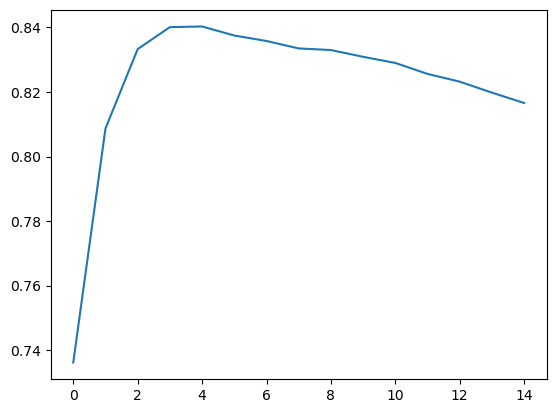

In [97]:
plt.plot(nn.epochs, nn.efficiency)

In [108]:
class Activation_Function:
    def __init__(self, func, deriv):
        self.function = func
        self.derivative = deriv
        l = func(-np.inf)
        self.min = l if l is not -np.inf else -1_000_000
        r = func(np.inf)
        self.max = r if r is not np.inf else 1_000_000
        
        
        
    def __init__(self, func, deriv, _min, _max):
        self.function = func
        self.derivative = deriv
        self.min = _min
        self.max = _max
        
        
class Layer:
    def __init__(self, nodes, act_func):
        self.nodes = nodes
        self.act_func = act_func
        self.error = None
        self.weight = None
        self.output = None
        self.bias = None
        
        
class NN:
    def __init__(self, input_nodes, l_r=0.01):
        self.input_nodes = input_nodes
        self.layers = []
        self.learning_rate = l_r
        
        
    def add_layer(self, layer):
        row, column = layer.nodes, self.input_nodes
        self.input_nodes = layer.nodes
        weight = np.random.normal(0.0, 
                                  pow(column, -0.5),                                  
                                  (row, column))                
#         bias = np.random.rand() 
        bias = np.random.normal()
        layer.bias = bias
        layer.weight = weight
        self.layers.append(layer)
        
    def forward_propagation(self, features):        
        self.input = features
        for l in self.layers:
            l.output = l.act_func.function(np.dot(l.weight, features) + l.bias)
            features = l.output
        return features
    
    def backward_propagation(self, error):
#         self.layers[-1].error = error
#         print("last layer weight is ", self.layers[-1].weight.shape)
#         print("last layer error is ", self.layers[-1].error.shape)
#         print("layers count is ", len(self.layers))
        for l in reversed(self.layers):
            l.error = error
#             print('weight is ', l.weight.T.shape)
#             print('error is ', error.shape)
            error = np.dot(l.weight.T, error)
#             error = l.error
       
        w_remarks = []
        b_remarks = []
        
#         print("----------------------------------------")
        
        for i in range(len(self.layers) - 1, 0, -1):
#             print("i is ", i)
            cur_l = self.layers[i]
            prev_l = self.layers[i-1]
            
#             print("cur_l.error is ", cur_l.error.shape)
#             print("cur_l.output is ", cur_l.output.shape)
#             print("cur_l.weight", cur_l.weight.shape)
#             print("prev_l.output is ", prev_l.output.shape)
            
#             print("shape of act func",  cur_l.act_func.derivative(cur_l.output).shape)
#             print("prev_l.ouput shape is ", prev_l.output.T.shape)
            r = self.learning_rate * np.dot(
                np.array((cur_l.error * cur_l.act_func.derivative(cur_l.output)), ndmin=2).T, 
                np.array(prev_l.output, ndmin=2)
            )
            cur_l.weight += r
            b = self.learning_rate * cur_l.error * cur_l.act_func.derivative(cur_l.output)
            cur_l.bias += b
        
        
        cur_l = self.layers[0]
#         print("cur_l.error is ", cur_l.error.shape)
#         print("cur_l.output", cur_l.output.shape)
        r = self.learning_rate * np.dot(
               np.array( (cur_l.error * cur_l.act_func.derivative(cur_l.output)), ndmin=2).T, 
               np.array( self.input, ndmin=2)
            )
        cur_l.weight += r            
        b = self.learning_rate * cur_l.error * cur_l.act_func.derivative(cur_l.output)
        cur_l.bias += b 
        
        
    def fit(self, Xs, ys):
        last_layer = self.layers[-1]
        output_nodes = last_layer.nodes
        for x_, y in zip(Xs, ys):
            vectored_target = np.zeros(output_nodes) - last_layer.act_func.min
            vectored_target[y] = last_layer.act_func.max
            output = self.forward_propagation(x_)
            error = vectored_target - output
            self.backward_propagation(error)
            
    def fit_epochs(self, Xs, ys, X_test, y_test, epoch_count):
        self.epochs = []
        self.efficiency = []
        self.efficiency_on_train = []
        
        for e in range(epoch_count):
            self.fit(Xs, ys)
            self.efficiency.append(self.calc_efficiency(X_test, y_test))
            self.epochs.append(e)
        
        
        
    def predict(self, x_):
        return self.forward_propagation(x_)
    
    
    def calc_efficiency(self, test_X, test_y):
        scorecard = []
        for (inputs, outputs) in zip(test_X, test_y):
            correct_label = outputs
            result = self.predict(inputs)
            self_label = np.argmax(result)
            if correct_label == self_label:
                scorecard.append(1)
            else:
                scorecard.append(0)
        
        scorecard_array = np.array(scorecard)
        return scorecard_array.sum() / scorecard_array.size
        

In [112]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.05
nn = NN(input_nodes, learning_rate)

sigmoid = Activation_Function(lambda x:scipy.special.expit(x), 
                                lambda x:(
                                        scipy.special.expit(x)
                                        *( 1- scipy.special.expit(x))
                                    ),
                              0, 1
                             )


nn.add_layer(Layer(hidden_nodes, sigmoid))
nn.add_layer(Layer(output_nodes, sigmoid))

nn.fit_epochs(X, y, X_test, y_test, 5)


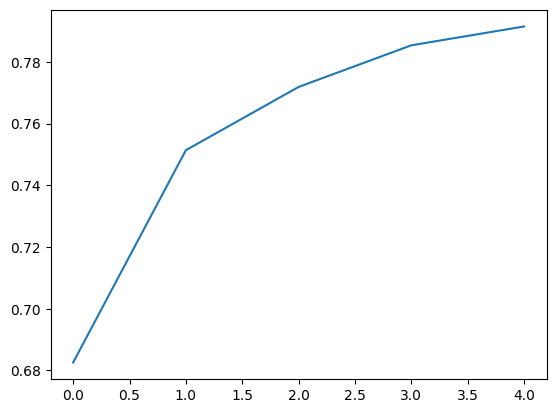

In [113]:
plt.plot(nn.epochs, nn.efficiency)

In [114]:
i = 9
print(y_test[i])
nn_answer = nn.predict(X_test[i])
np.argmax(nn_answer)

9


9

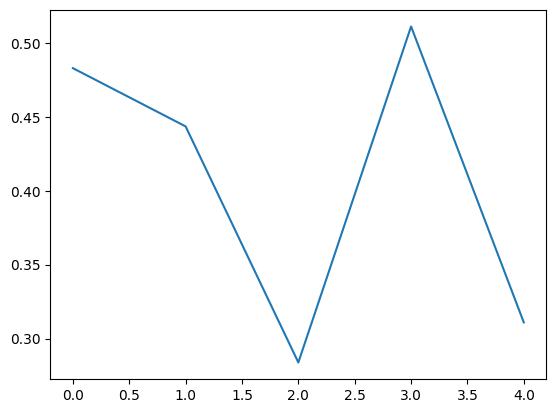

In [115]:
nn_relu = NN(input_nodes, learning_rate)

relu = Activation_Function(
    lambda x : np.array([i if i > 0 else 0 for i in x]),
    lambda x : np.array([1 if i >= 0 else 0 for i in x]), 
    0, 1
)

nn_relu.add_layer(Layer(hidden_nodes, relu))
nn_relu.add_layer(Layer(output_nodes, sigmoid))

nn_relu.fit_epochs(X, y, X_test, y_test, 5)
plt.plot(nn_relu.epochs, nn_relu.efficiency)

In [122]:
X[0].reshape(28, 2)

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

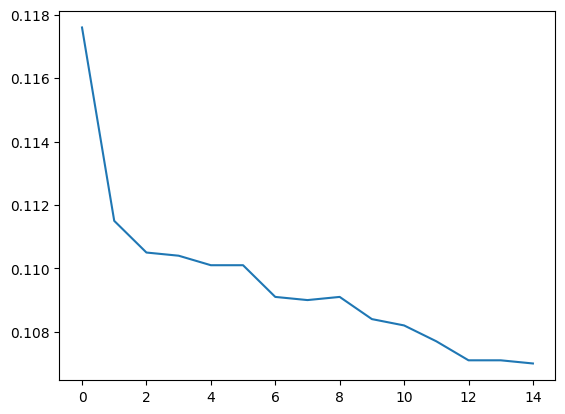

In [121]:
hyper_tan = Activation_Function(
        lambda x : np.tanh(x), 
        lambda x : 1 - pow(np.tanh(x), 2),
        -1, 1
)

nn_tanh = NN(input_nodes, learning_rate)

nn_tanh.add_layer(Layer(hidden_nodes, hyper_tan))
nn_tanh.add_layer(Layer(output_nodes, hyper_tan))

nn_tanh.fit_epochs(X, y, X_test, y_test, 15)
plt.plot(nn_tanh.epochs, nn_tanh.efficiency)

In [450]:
step = Activation_Function(
            lambda x : np.array([1 if i > 0 else 0 for i in x]),
            lambda x : np.array([0 if i >= 0 else 0 for i in x]),
            0, 1
)

In [449]:
np.ones(9)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [414]:
i = 5
print(y_test[i])
nn_answer = nn_tanh.predict(X_test[i])
np.argmax(nn_answer)

1


1

In [427]:
np.array(X).flatten().min()

0.0

In [396]:
t = lambda x : np.tanh(x)
pow(2, 3)

8

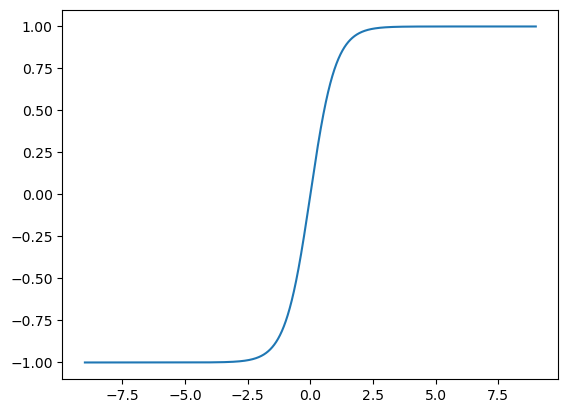

In [403]:
plt.plot(np.arange(-9000, 9000) / 1000, np.tanh(np.arange(-9000, 9000) / 1000))

In [385]:
a = lambda x:scipy.special.expit(x)
a(np.inf)

1.0

In [365]:
np.tanh(-np.inf)

-1.0

In [346]:
a = lambda x: x if x.all() > 0 else 0
a = lambda x : [i if i > 0 else 0 for i in x]
arr = np.arange(4)- 1.9 
print(arr)
a(arr)

[-1.9 -0.9  0.1  1.1]


[0, 0, 0.10000000000000009, 1.1]

In [344]:
x = [1,4,-8,3]
[i if i > 0 else 0 for i in x]

[1, 4, 0, 3]

In [ ]:
def relu(x):
    res = []
    for i in x:
        i